In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing Data
df=pd.read_csv('fifa_eda.csv')
pd.pandas.set_option('display.max_columns',None)

In [4]:
#data processing 
df.head()

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  
0           2021-01-01  5.583333   159.0        226500.0  
1           2022-01-01  6.166667   183.0        127100.0  
2           2022-01-01  5.750000   150.0        228100.0  
3           2020-01-01  6.333333   168.0        138600.0  
4           2023-01-01  5.916667   154.0        196400.0

In [5]:
#Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [6]:
#Shape of the data
df.shape

(18207, 18)

In [7]:
df.columns #checking number of columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')

In [14]:

    
    # Eliminating the features containing null values:
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 1]
for features in features_with_na:
      print(features, np.round(df[features].isnull().mean()*100 , 2), '% missing values')


Club 1.32 % missing values
Value 1.38 % missing values
International Reputation 0.26 % missing values
Skill Moves 0.26 % missing values
Contract Valid Until 1.59 % missing values


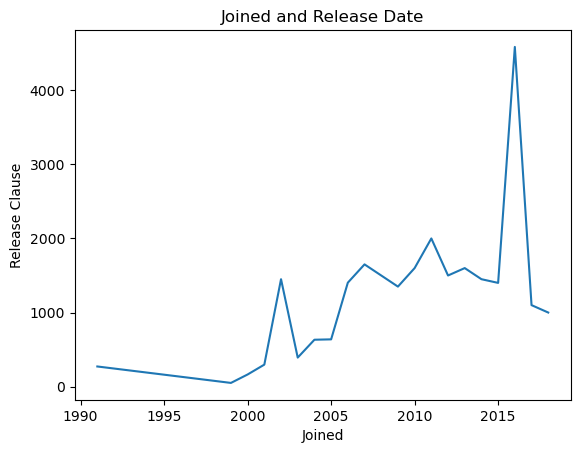

In [15]:
#Relation between year features and target varibales
df.groupby('Joined')['Release Clause'].median().plot()
plt.xlabel('Joined')
plt.ylabel('Release Clause')
plt.title('Joined and Release Date')
plt.show() 
#Observations :
#From the above graph we can comprehend that players who joined in the year 2015 have more Release Clause

C:\Users\Dossani\AppData\Local\Temp\ipykernel_13016\933783711.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot=sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


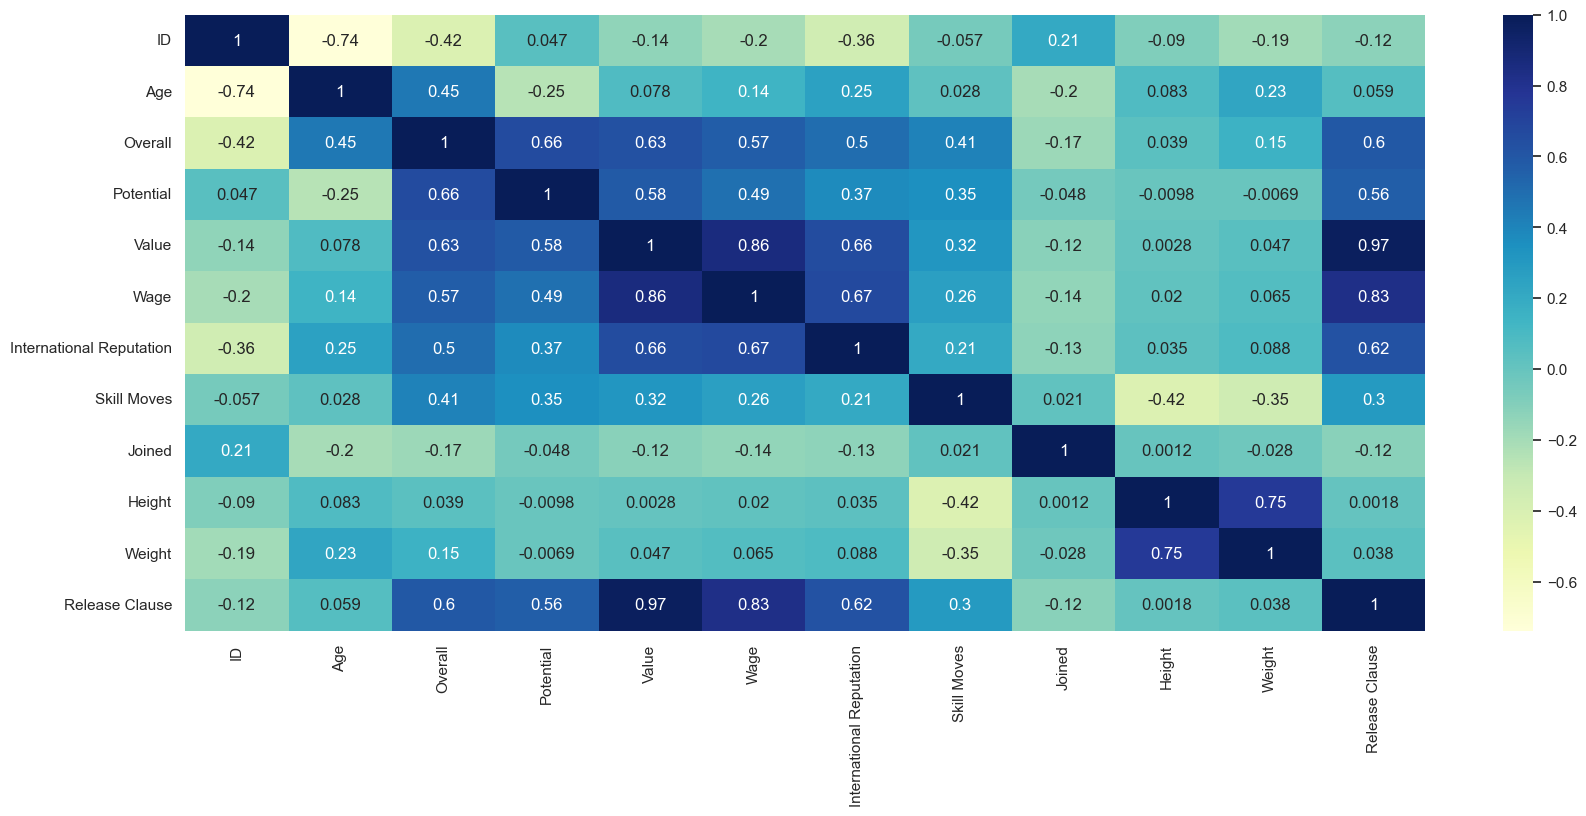

In [19]:
#DATA VISUALIZATION
dataplot=sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
sns.set(rc= {'figure.figsize':(20,10)})
plt.show()

In [ ]:
#Observations:

#1.There is strong correlation between International Reputation and Wage.

#2.Skill Moves has NEGATIVE correlation with HEIGHT and WEIGHT.

#3.AGE has little bit positive correlation with WAGE.

#4.AGE has strong NEGATIVE CORRELATION with POTENTIAL but POSTIVE CORRELATION with OVERALL rating.

#5.OVERALL RATING has strong POSITIVE CORRELATION with WAGE and RELEASE CLAUSE

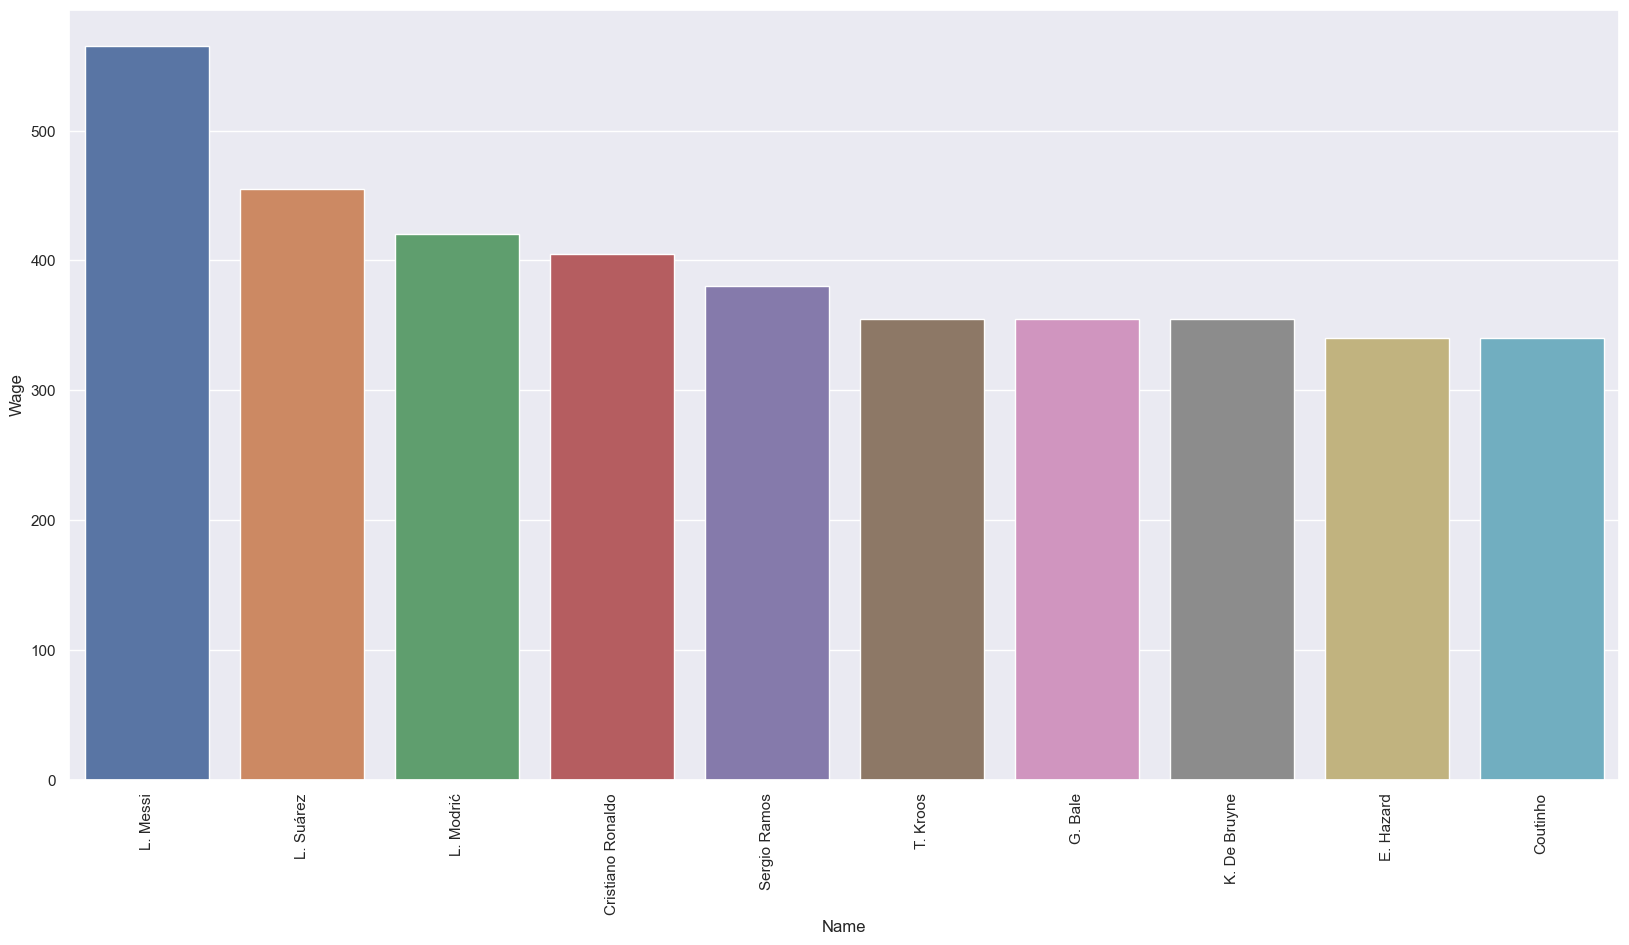

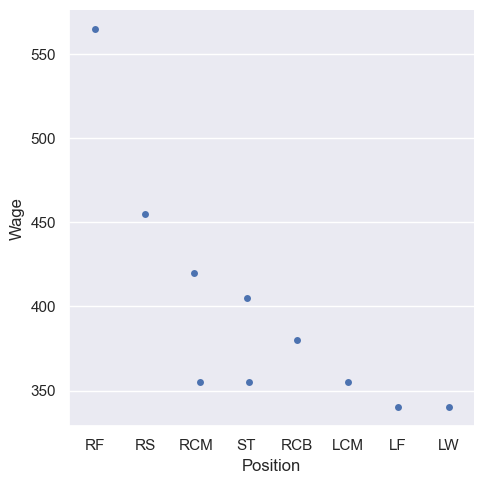

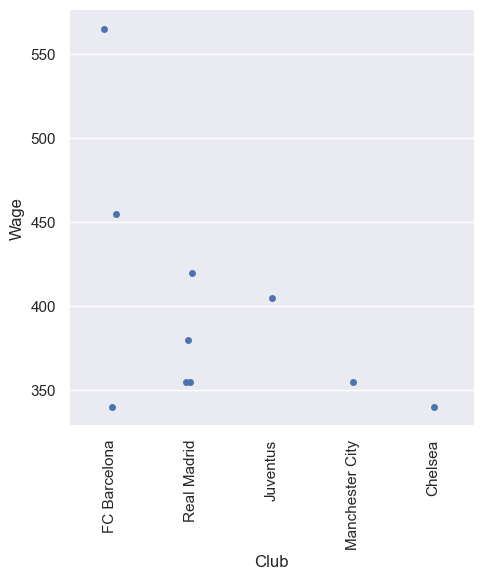

In [25]:
#Players with Highest Wages
df_max_wage=df.sort_values(by= 'Wage', ascending=0).head(10)
fig, ax=plt.subplots()
ax1=sns.barplot(x='Name',y='Wage', data=df_max_wage, label='Club')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

ax2=sns.catplot(x='Position', y='Wage', data=df_max_wage)
ax2=sns.catplot(x='Club', y='Wage', data=df_max_wage).set_xticklabels(rotation=90)

In [27]:
#Players as per Nationality
df_nationality=df['Nationality'].value_counts()
df_nationality.value_counts

<bound method IndexOpsMixin.value_counts of England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: Nationality, Length: 164, dtype: int64>

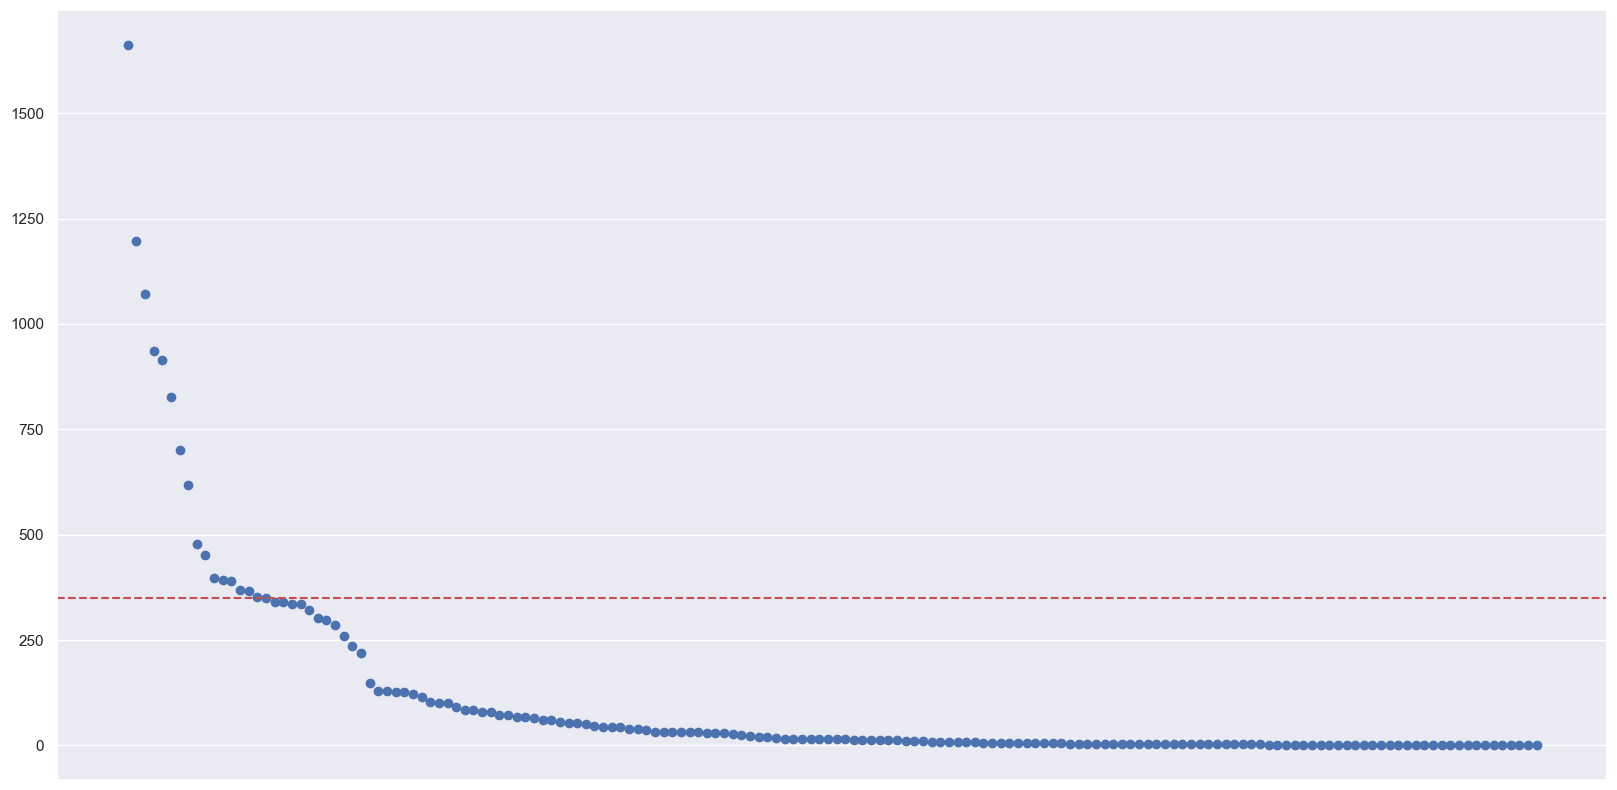

In [28]:
plt.scatter(df_nationality.index,df_nationality.values)
plt.xticks([])
plt.axhline(y=350, color='r', linestyle='--')

In [29]:
#Players by Nationality
df_nationality=df_nationality[df_nationality>250]
df_nationality

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
United States           353
Poland                  350
Norway                  341
Saudi Arabia            340
Denmark                 336
Korea Republic          335
Portugal                322
Turkey                  303
Austria                 298
Scotland                286
Belgium                 260
Name: Nationality, dtype: int64

Text(0.5, 1.0, 'No. of Players by nationality')

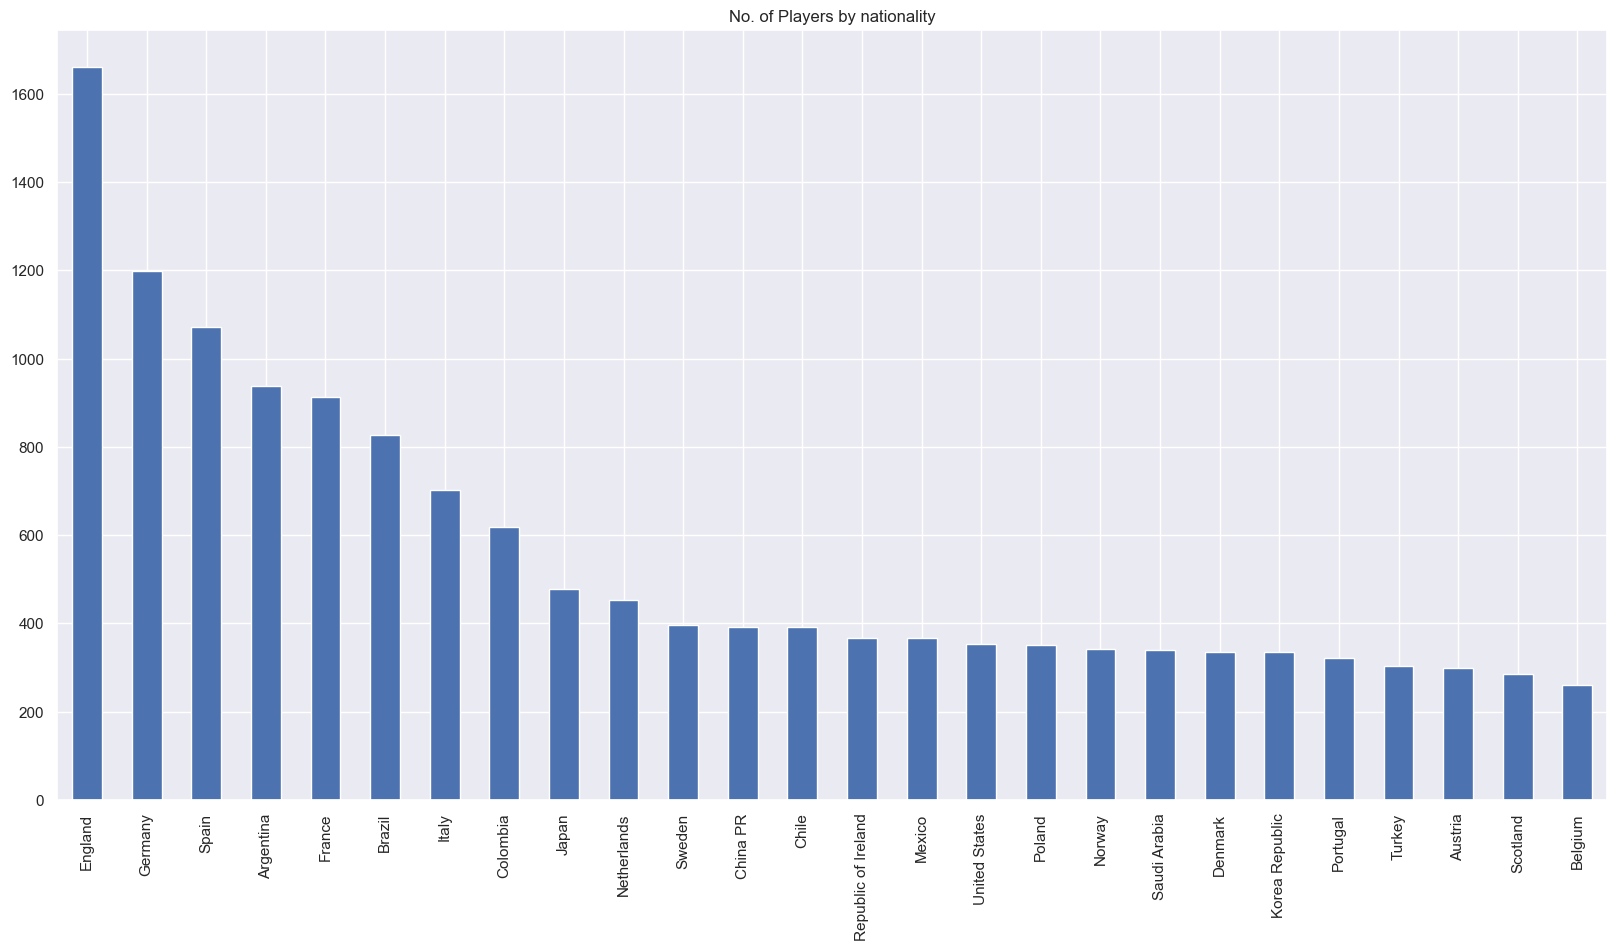

In [30]:
#Players by Nationality
df_nationality.plot.bar()
plt.title('No. of Players by nationality')